### Что было сделано:
1. Импортированы библиотеки
2. Загружены датафреймы
3. Для каждого датафрейма даты были переведены в формат datetime, а также установил их, как индекс
4. Проведен тест дики Фуллера. df1, df2 -- стационарные ряды, остальные -- нестационарные
5. Для того, чтобы привести ряд к стационарности, была взята разность. df4 -- по-прежнему оказался нестационарным
6. Был взят log от каждого значения и вычтена разность. Результат: все df, у которых были ряды не стационарными, стали стационарными
7. Таким образом, взятие log от значения и вычитание предыдущего -- является наилучшим способом для приведения к стационарности

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import adfuller

In [2]:

df1 = pd.read_csv('daily-total-female-births-in-cal.csv')
df2 = pd.read_csv('mean-monthly-air-temperature-deg.csv')
df3 = pd.read_csv('monthly-boston-armed-robberies-j.csv')
df4 = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
df5 = pd.read_csv('weekly-closings-of-the-dowjones-.csv')


In [3]:
def date_format(*dfs):
    for df in dfs:
        for col in df.columns:
            if 'Date' in col:
                df[col] = pd.to_datetime(df[col])
                df.set_index('Date', inplace=True)
            elif 'Month' in col:
                df[col] = pd.to_datetime(df[col], format='%Y-%m')
                df.set_index('Month', inplace=True)
            elif 'Week' in col:
                df[col] = df[col].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-W%W-%w"))
                df.set_index('Week', inplace=True)
            else:
                pass
        df.info()


df_date = date_format(df1, df2, df3, df4, df5)

df_date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deg     240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0

            Count
Date             
1959-01-01     35
1959-01-02     32
1959-01-03     30
1959-01-04     31
1959-01-05     44
...           ...
1959-12-27     37
1959-12-28     52
1959-12-29     48
1959-12-30     55
1959-12-31     50

[365 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
Единичных корней нет, ряд стационарный


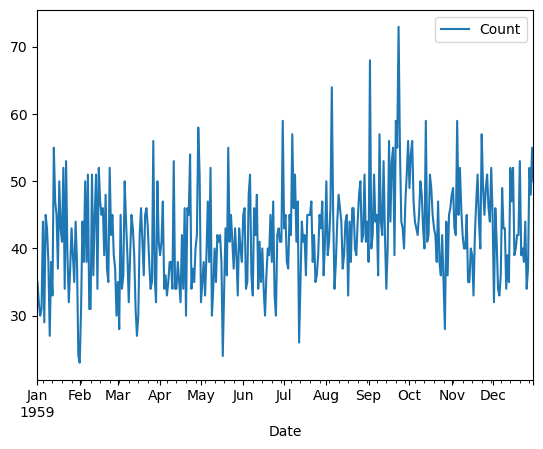

----------
             Deg
Month           
1920-01-01  40.6
1920-02-01  40.8
1920-03-01  44.4
1920-04-01  46.7
1920-05-01  54.1
...          ...
1939-08-01  61.8
1939-09-01  58.2
1939-10-01  46.7
1939-11-01  46.6
1939-12-01  37.8

[240 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
Единичных корней нет, ряд стационарный


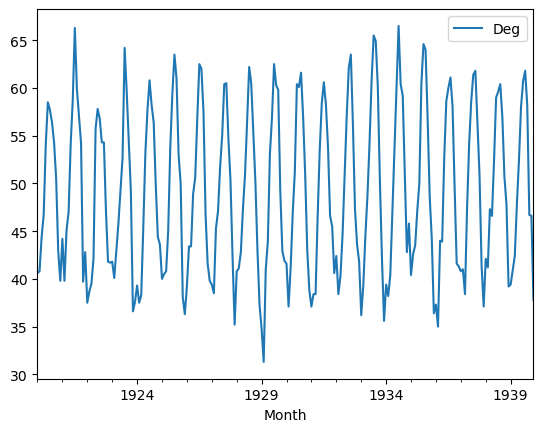

----------
            Count
Month            
1966-01-01     41
1966-02-01     39
1966-03-01     50
1966-04-01     40
1966-05-01     43
...           ...
1975-06-01    316
1975-07-01    398
1975-08-01    394
1975-09-01    431
1975-10-01    431

[118 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Единичные корни есть, ряд нестационарный


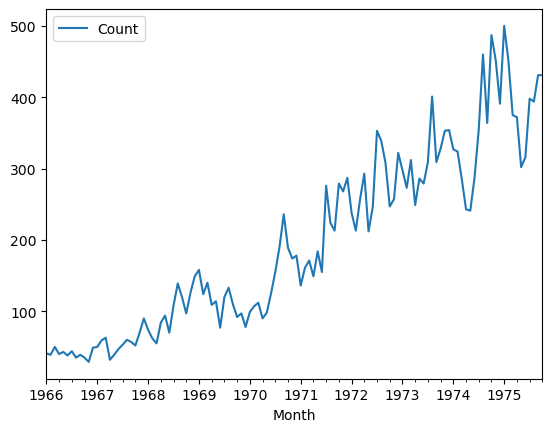

----------
            Count
Month            
1965-01-01    154
1965-02-01     96
1965-03-01     73
1965-04-01     49
1965-05-01     36
...           ...
1971-01-01    628
1971-02-01    308
1971-03-01    324
1971-04-01    248
1971-05-01    272

[77 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Единичные корни есть, ряд нестационарный


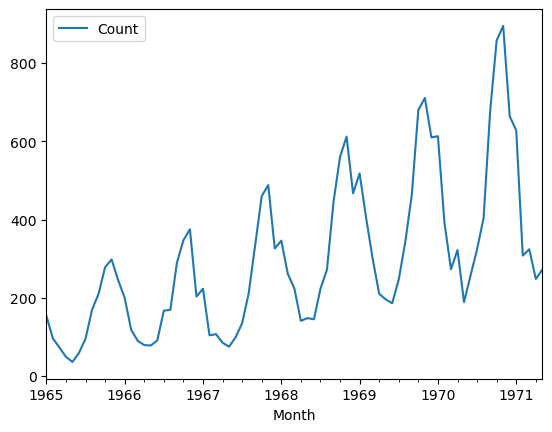

----------
             Close
Week              
1971-07-05  890.19
1971-07-12  901.80
1971-07-19  888.51
1971-07-26  887.78
1971-08-02  858.43
...            ...
1974-07-15  791.77
1974-07-22  787.23
1974-07-29  787.94
1974-08-05  784.57
1974-08-12  752.58

[162 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64
Единичные корни есть, ряд нестационарный


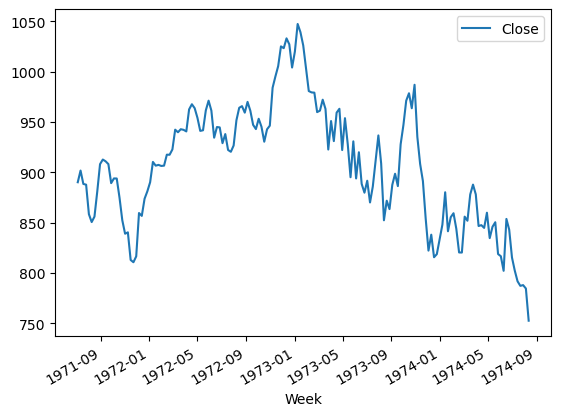

----------


In [4]:
def test_stationarity(*dfs):
    for df in dfs:
        print(df)
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(df, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for [key, value] in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)
        if dfoutput['Test Statistic'] > dfoutput['Critical Value (5%)']:
            print("Единичные корни есть, ряд нестационарный")
        else:
            print("Единичных корней нет, ряд стационарный")
        df.plot()
        plt.show()
        print('----------')
    
df_fuller = test_stationarity(df1, df2, df3, df4, df5)
df_fuller


Month
1966-02-01    -2.0
1966-03-01    11.0
1966-04-01   -10.0
1966-05-01     3.0
1966-06-01    -5.0
              ... 
1975-06-01    14.0
1975-07-01    82.0
1975-08-01    -4.0
1975-09-01    37.0
1975-10-01     0.0
Name: Count, Length: 117, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Единичных корней нет, ряд стационарный


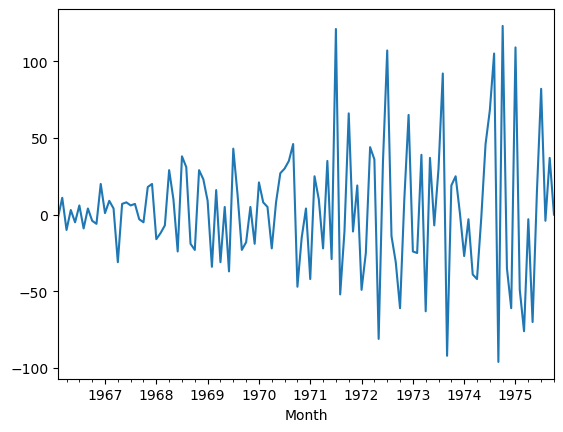

----------
Month
1965-02-01    -58.0
1965-03-01    -23.0
1965-04-01    -24.0
1965-05-01    -13.0
1965-06-01     23.0
              ...  
1971-01-01    -36.0
1971-02-01   -320.0
1971-03-01     16.0
1971-04-01    -76.0
1971-05-01     24.0
Name: Count, Length: 76, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -2.587970
p-value                         0.095509
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64
Единичные корни есть, ряд нестационарный


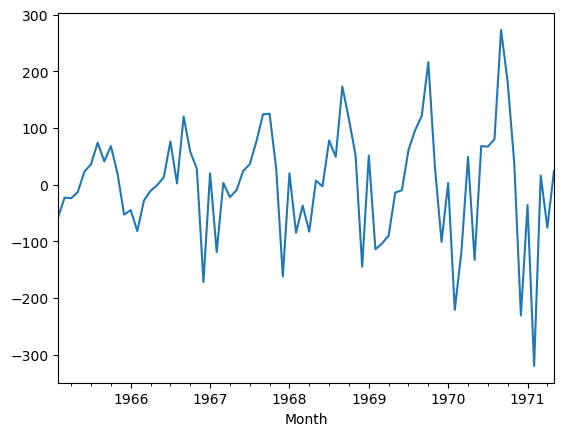

----------
Week
1971-07-12    11.61
1971-07-19   -13.29
1971-07-26    -0.73
1971-08-02   -29.35
1971-08-09    -7.82
              ...  
1974-07-15   -10.64
1974-07-22    -4.54
1974-07-29     0.71
1974-08-05    -3.37
1974-08-12   -31.99
Name: Close, Length: 161, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64
Единичных корней нет, ряд стационарный


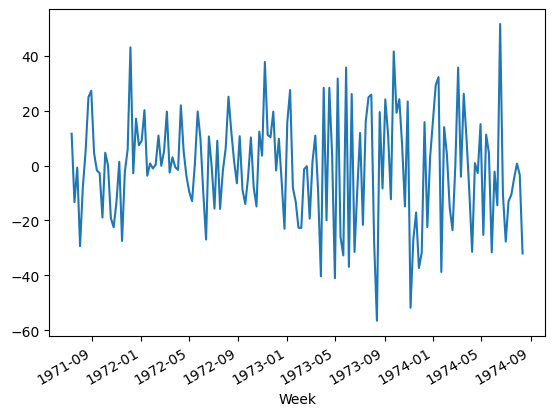

----------


In [5]:

def diff(*dfs):
    result = []
    for df in dfs:
        df_copy = df.copy()  # создаем копию датафрейма
        for col in df_copy.columns:
            if 'Count' in col or 'Deg' in col or 'Close' in col:
                df_copy[col] = df_copy[col].diff()
                df_copy = df_copy[col].dropna()
                #df_copy[col].plot()
                #plt.show()
        result.append(df_copy)

    return result

df_diff = diff(df3, df4, df5)

for df in df_diff:
    test_stationarity(df)
#После использования разности, df3 и df5 стали стационарными

Month
1966-02-01   -0.050010
1966-03-01    0.248461
1966-04-01   -0.223144
1966-05-01    0.072321
1966-06-01   -0.123614
                ...   
1975-06-01    0.045315
1975-07-01    0.230710
1975-08-01   -0.010101
1975-09-01    0.089757
1975-10-01    0.000000
Name: Count, Length: 117, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
Единичных корней нет, ряд стационарный


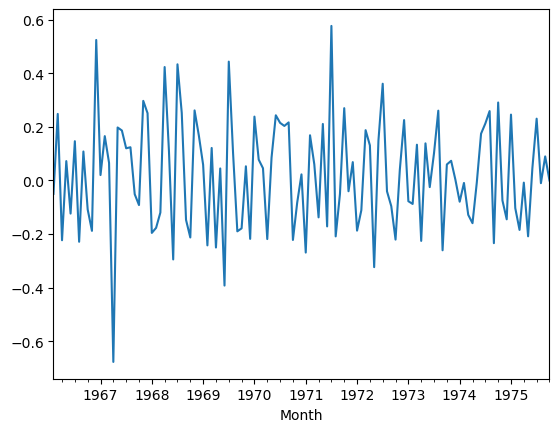

----------
Month
1965-02-01   -0.472604
1965-03-01   -0.273889
1965-04-01   -0.398639
1965-05-01   -0.308301
1965-06-01    0.494019
                ...   
1971-01-01   -0.055742
1971-02-01   -0.712440
1971-03-01    0.050644
1971-04-01   -0.267315
1971-05-01    0.092373
Name: Count, Length: 76, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Единичных корней нет, ряд стационарный


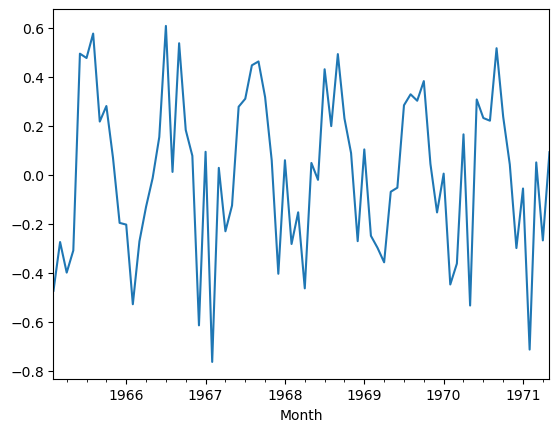

----------
Week
1971-07-12    0.012958
1971-07-19   -0.014847
1971-07-26   -0.000822
1971-08-02   -0.033619
1971-08-09   -0.009151
                ...   
1974-07-15   -0.013349
1974-07-22   -0.005750
1974-07-29    0.000901
1974-08-05   -0.004286
1974-08-12   -0.041628
Name: Close, Length: 161, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64
Единичных корней нет, ряд стационарный


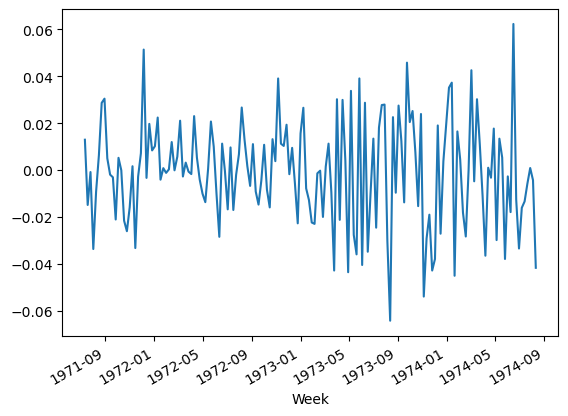

----------


In [6]:

def log_diff(*dfs):
    result = []
    for df in dfs:
        df_copy = df.copy()  # создаем копию датафрейма
        for col in df_copy.columns:
            if 'Count' in col or 'Deg' in col or 'Close' in col:
                df_copy[col] = np.log(df_copy[col])
                df_copy[col] = df_copy[col].diff()
                df_copy = df_copy[col].dropna()
                #df_copy[col].plot()
                #plt.show()
        result.append(df_copy)        
    return result

df_log = log_diff(df3,df4,df5)
for df in df_log:
    test_stationarity(df)